In [69]:
import rampy as rp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime
import os

from pydantic import BaseModel
from typing import List

import matplotlib.dates as mdates
axisx_format = mdates.DateFormatter('%H:%M')

In [70]:
class XRange(BaseModel):
    lower_limit:float
    higher_limit:float

def _select_range(x_range:XRange, data:np.array) -> np.array:
    cond1 = data[:,0] > x_range.lower_limit
    cond2 = data[:,0] < x_range.higher_limit
    cond = cond1 & cond2
    data = data[cond].copy()
    return data

def load_data(filename:str, x_range:XRange=None,  basepath:str="./data") -> np.array:
    # from glob import glob
    import os
    filepath = os.path.join(basepath, f"{filename}")
    if(os.path.exists(filepath) == False):
        raise FileExistsError(f"{filepath=} is not exists")
    spectrum = np.genfromtxt(filepath)
    # Flip X-axis
    spectrum = rp.flipsp(spectrum)
    if(x_range != None):
        assert isinstance(x_range, XRange), f"limit_x must be `XRange`"
        spectrum = _select_range(x_range=x_range, data=spectrum)
    return spectrum

## OGTT result

Let's plot how the OGTT went for s1, s2, s3, and s4

In [71]:
subj_ids = ['s1','s2','s3','s4']
ogtts = []
basepath = "../../data/pilot"
for subj_id in subj_ids:
    filepath = os.path.join(basepath, f"{subj_id}.csv")
    if(os.path.exists(filepath) == False):
        raise FileExistsError(f"{filepath=} is not found")
    df = pd.read_csv(filepath,parse_dates=['time'], dtype={'glucose':'float',
                                    'prefix':'string'})
    ogtts.append(df)


In [72]:
today = datetime.today().replace(hour=1, minute=0, second=0, microsecond=0)

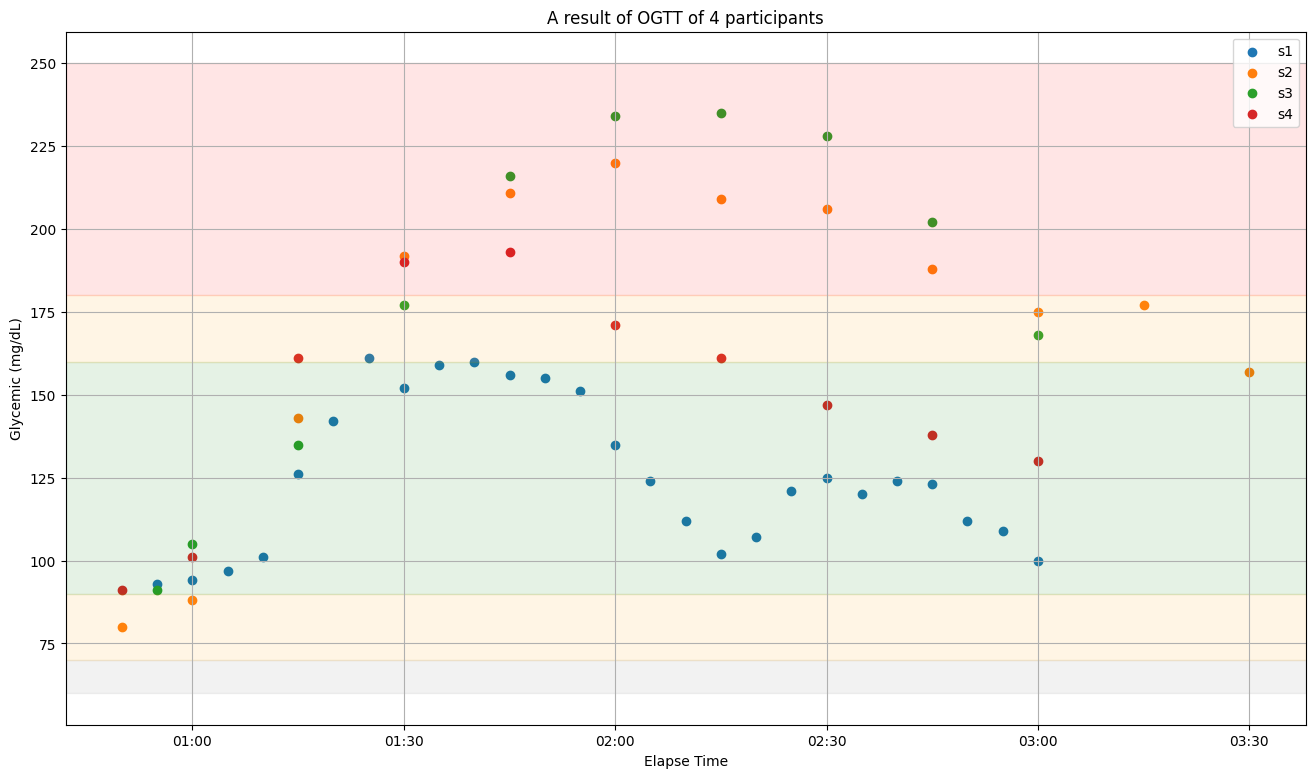

In [96]:
fig, ax = plt.subplots(figsize=(16,9))
for subj_id, ogtt in zip(subj_ids, ogtts):
    x = ogtt.time
    y = ogtt.glucose
    elapse = x - x[1]
    ax.scatter(elapse + today,y, label=subj_id)


ax.set_title("A result of OGTT of 4 participants")
ax.set_xlabel("Elapse Time")
ax.set_ylabel("Glycemic (mg/dL)")
ax.xaxis.set_major_formatter(axisx_format)
ax.axhspan(60,70, color='grey', alpha=0.1)
ax.axhspan(70,90, color='orange', alpha=0.1)
ax.axhspan(90,160, color='green', alpha=0.1)
ax.axhspan(160,180, color='orange', alpha=0.1)
ax.axhspan(180,250, color='red', alpha=0.1)
ax.legend()
ax.grid()
plt.show()

In [4]:
x_range = XRange(lower_limit=900, higher_limit=1500)